# This code is made for testing out Markowitz Portfolio Theory.

Throughout this notebook, I will walk you through the math and code going on. 

First, we must import a few important packages that will be useful for us.

In [17]:
import numpy as np

from stock_simulation.simulate_stocks import simulate_stocks
from plotting.plot_stock_data import plot_stock_data
from plotting.plot_efficient_frontier import plot_efficient_frontier

# Up first is the simulatation of stocks.

To do this, we must set up our constants:

* We set our current risk free interest rate (retreived at [this website](https://www.bloomberg.com/markets/rates-bonds/government-bonds/us)). This can also be toggled to whatever we would like.
* $T$ is a constant that represents how long we will let our simulated stock run for, in years. For example: $T=1$ means that the stock will be simulated for a year. $T=\frac{1}{12}$ means that it will be simulated for a month..
* Lastly, we generate a few random values to assign as our drift value $\mu$ and volatility $\sigma$. We also randomly generate the starting price, and we are given the choice to add in the risk free rate as an asset. If we choose to add the risk free asset, we will see it in our graphics.

In [18]:
# Preparing constants

T = 1         # Timeframe (in years)
dT = 1/252    # Change in time (in years). 252 trading days in a year, so approximately 1/252
num_stocks = 10
mu_range = (-.1, 2)         # Randomly assigning different stocks different drift values (mu),
sigma_range = (0.1, 1)      # volatilities/standard deviations (sigma),
S0_range = (20, 100)        # and starting prices (S0).

## Here we get to some meat!

The way we simulate our stocks is using *Geometric Brownian Motion*. The formula for a stock $S(t)$ that is given by Geometric Brownian Motion is solved by the differential equation

$$dS = \mu S dt + \sigma S dW,$$

where $\mu$ is the *drift* of the stock, $\sigma$ is the volatility of the stock, and $W(t)$ is Brownian motion.

The solution to this differential equation is given by

$$ S(t) = S_0 e^{\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W(t)},$$

where $S_0$ is the initial price of the stock at time $t=0$. This type of motion is often used to simulate stocks in the stock market because it has the randomness of Brownian motion, cannot go below 0, and also tends to gain momentum over time, just as other stocks do.  

Many people like to work with the log of this data, since the differential equation has a much nicer solution and since it follows a normal distribution (hence the name *lognormal*). Let $G(t) = \ln{S(t)}$. Then the differential equation that describes $G$ is given by

$$ dG = \left(\mu - \frac{\sigma^2}{2}\right)dt + \sigma dW.$$

This is just simple bronwian motion, and has the solution

$$ G(t) = \left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W(t) + C,$$

where $C = G(0)$. Thus, solving for $C$, we get

$$\ln{\frac{S(t)}{S_0}} = \left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W(t).$$

To simulate Brownian motion, we can use a limit of random walks!

Let $X_i$ be independant random variables with mean 0 and variance 1 for each $i \in \mathbb{N}$. Define

$$ W_n(t) = \frac{1}{\sqrt{n}}\sum_{i=1}^{⌊nt⌋} X_i.$$

[Donsker's theorem](https://en.wikipedia.org/wiki/Donsker%27s_theorem) tells us that $\lim_{n\rightarrow ∞}W_n(t)$ converges to $W(t)$, where $W$ is our mean 0 variance 1 brownian motion!

Sources:
* https://en.wikipedia.org/wiki/Geometric_Brownian_motion
* https://en.wikipedia.org/wiki/Wiener_process

In [19]:
data, lognormal_data, drift_mus, std_dev_sigmas, S0s = simulate_stocks(num_stocks, T, mu_range, sigma_range, S0_range)

/Users/rattzombie/Desktop/School/CPE/summer2024research/stock_simulation/simulate_stocks.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[i][j] = S0s[i] * np.exp(
/Users/rattzombie/Desktop/School/CPE/summer2024research/stock_simulat

Let us plot our stocks to see how it looks

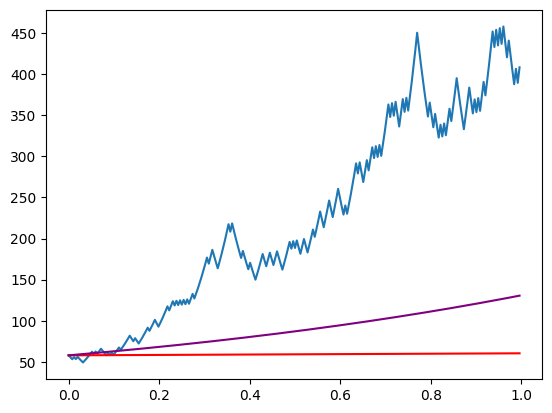

stock = 0
mu = 0.8145399590300075
sigma = 0.7134122910281017
S0 =  58


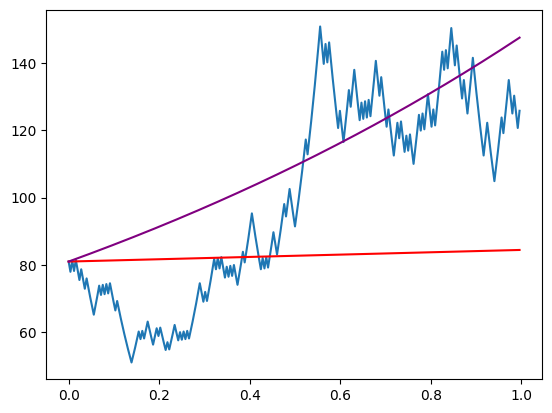

stock = 1
mu = 0.6018064917524911
sigma = 0.6324343636034153
S0 =  81


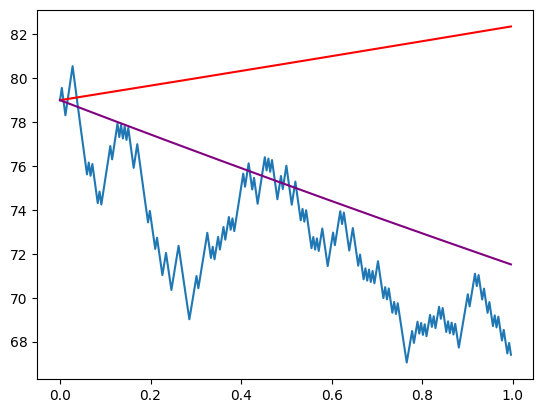

stock = 2
mu = -0.09987628279061615
sigma = 0.11852490234311158
S0 =  79


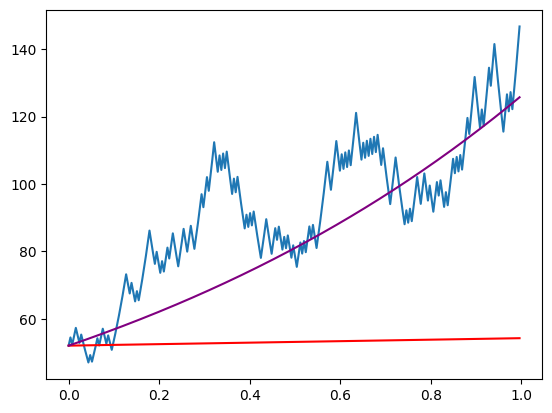

stock = 3
mu = 0.8865895323026162
sigma = 0.6855478846474563
S0 =  52


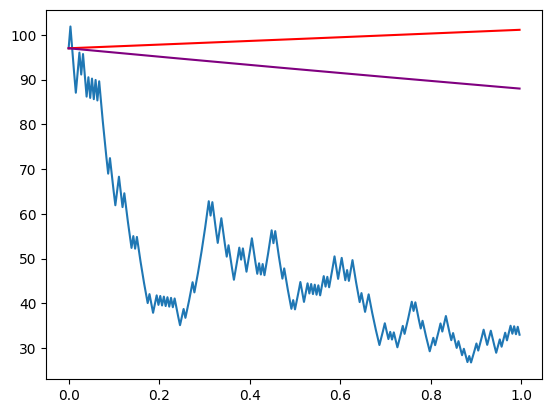

stock = 4
mu = -0.09776233065529621
sigma = 0.8042637238707738
S0 =  97


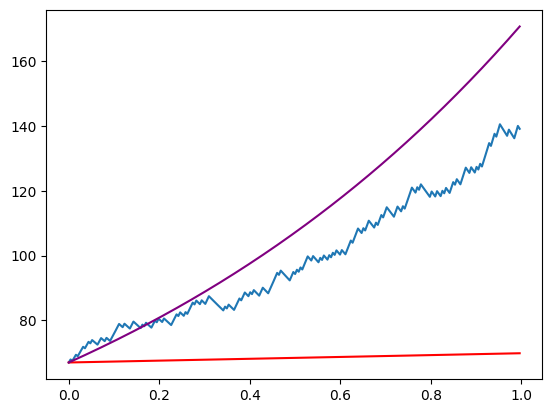

stock = 5
mu = 0.9392012800586461
sigma = 0.1602970198307272
S0 =  67


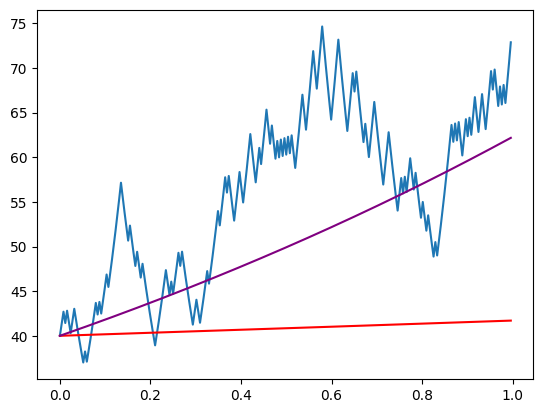

stock = 6
mu = 0.44278088978672403
sigma = 0.49801245875594935
S0 =  40


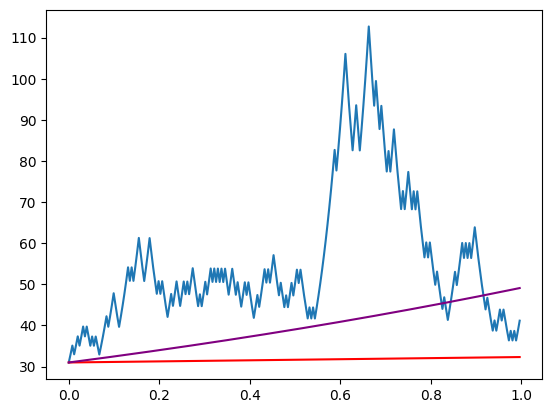

stock = 7
mu = 0.46159677343595806
sigma = 0.9898823972099163
S0 =  31


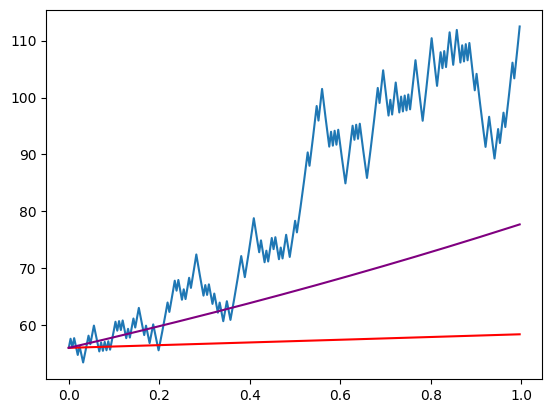

stock = 8
mu = 0.32874028625982155
sigma = 0.43253593284154956
S0 =  56


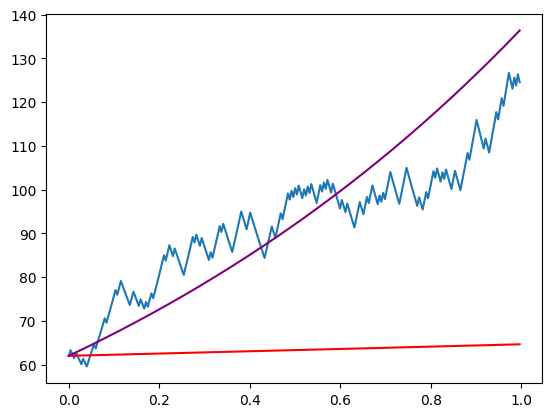

stock = 9
mu = 0.7914879286594758
sigma = 0.27729392727571395
S0 =  62


In [20]:
# Plot simulated data
plot_stock_data(data, T, dT, S0s, drift_mus, std_dev_sigmas, lognormal=False)

Looks good! How about the lognormal data?

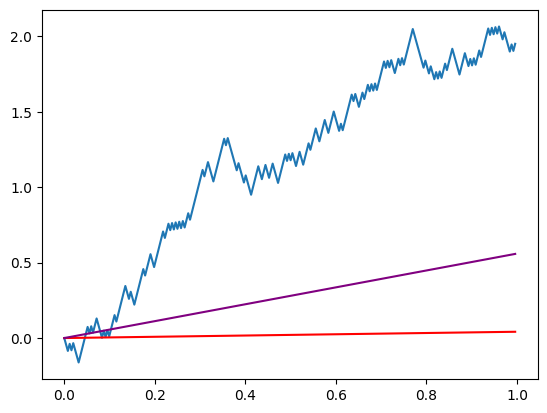

stock = 0
mu = 0.8145399590300075
sigma = 0.7134122910281017
S0 =  58


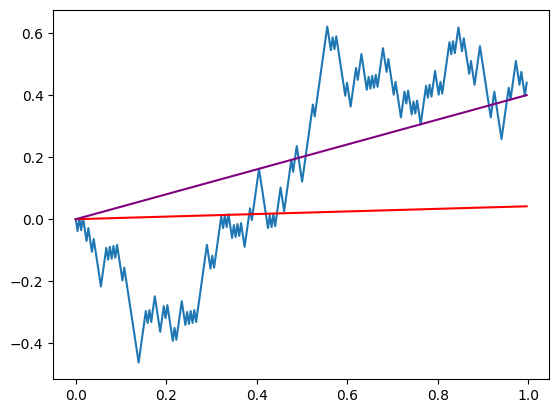

stock = 1
mu = 0.6018064917524911
sigma = 0.6324343636034153
S0 =  81


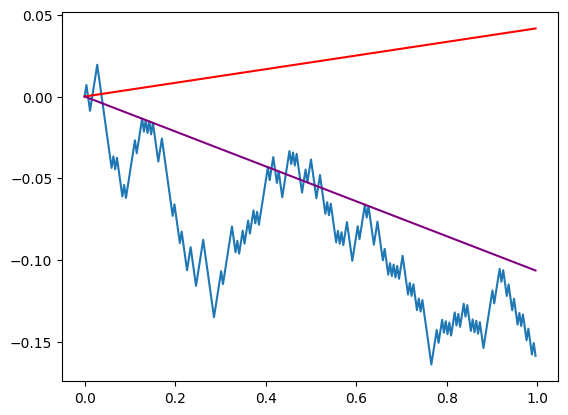

stock = 2
mu = -0.09987628279061615
sigma = 0.11852490234311158
S0 =  79


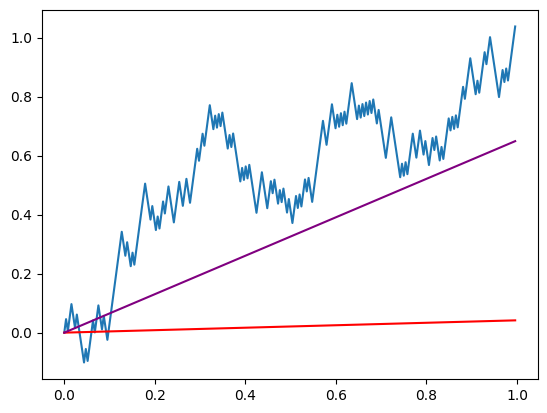

stock = 3
mu = 0.8865895323026162
sigma = 0.6855478846474563
S0 =  52


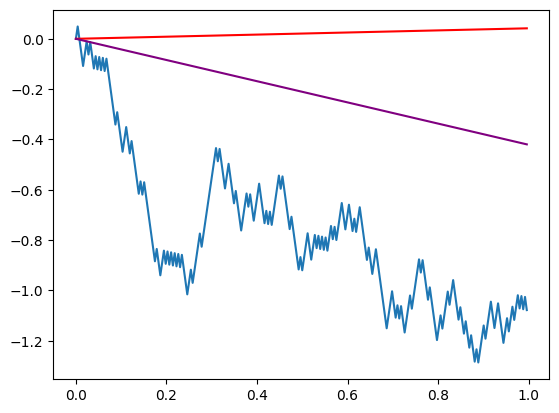

stock = 4
mu = -0.09776233065529621
sigma = 0.8042637238707738
S0 =  97


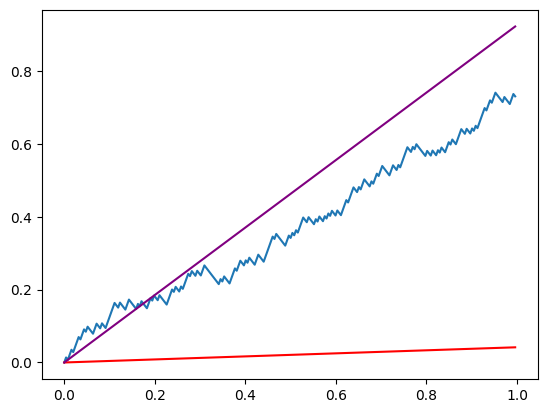

stock = 5
mu = 0.9392012800586461
sigma = 0.1602970198307272
S0 =  67


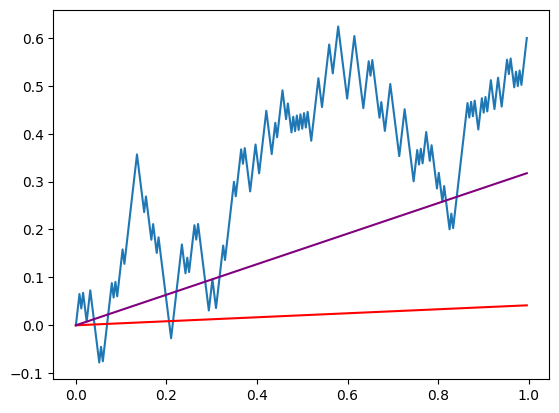

stock = 6
mu = 0.44278088978672403
sigma = 0.49801245875594935
S0 =  40


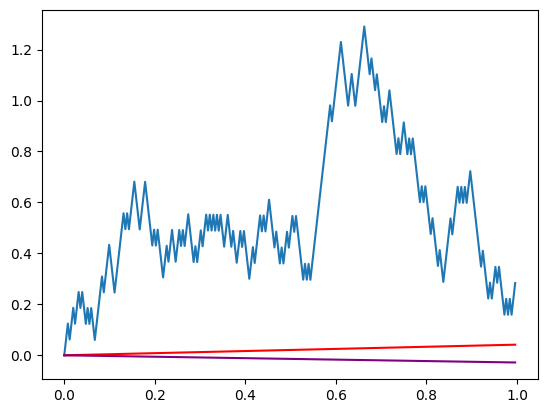

stock = 7
mu = 0.46159677343595806
sigma = 0.9898823972099163
S0 =  31


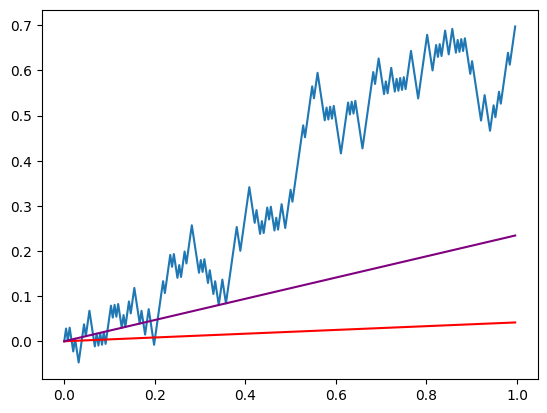

stock = 8
mu = 0.32874028625982155
sigma = 0.43253593284154956
S0 =  56


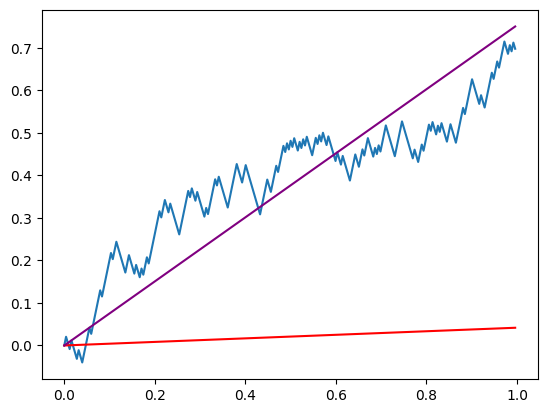

stock = 9
mu = 0.7914879286594758
sigma = 0.27729392727571395
S0 =  62


In [21]:
plot_stock_data(lognormal_data, T, dT, S0s, drift_mus, std_dev_sigmas, lognormal=True)

Nice! Note that when you plot the lognormal data it looks linear-ish! You can review the math above to convince yourself why this is the case.

# Next up: Modern Portfolio Thoery

## First, some background and math

This is the code that represents the *Markowitz portfolio theory*, also known as *modern portfolio theory*! The basic idea of this model is that investors will base their decisions on what to invest on soley on the expected return of a stock and the volatility of the stock. Here are the assumptions of our model:
* Investors seek to maximize the expected return of total wealth
* All investors have the same expected single period investment horizon
* All investors are risk-adverse, that is they will only accept greater risk if they
are compensated with a higher expected return
* Investors base their investment decisions on the expected return and risk
* All markets are perfectly efficient (e.g. no taxes and no transaction costs).

Markowitz originally wanted to create a model for stock portfolio selection that emphasizes diversification as important, as many other models at the time did not take into account diversification of assets. He did this by trying to minimize volatility for a given expected return.

Our goal here is to empirically find these optimal portfolios.

One thing that is important to note is that all of this is done in terms of the random variables for *rate of return*. Given a stock $X$ and a random variable $R_t$ representing the value of the stock at some discrete incriment $t$, the rate of return of the stock is

$$ r_t = \frac{R_t}{R_{t-1}}-1.$$

Using this value is so that stocks are weighed only on their percent increase. Here is the setup:

Given stocks $X_i$ for $i=1,\cdots, n$, let $r_i$ be their respective rates of return. Let $T$ be a positive number representing the time in years you want to measure. Let $e=(1, \cdots, 1)$ be the vector of all ones of length $n$, $w = (w_1, \cdots, w_n)$ be a vector such that $⟨e, w⟩ = 1$. Additionally, let $\Sigma$ denote the covariance matrix for $r_1, \cdots, r_n$. We call $w$ a *portfolio*, and the entries of $w$ are the *weights* of the portfolio. Let $\mu_i$ denote the expected rate of return for $r_i$ at time $T$. Let $m = (\mu_1, \cdots, \mu_n)$. We can calcualte the volatility $\sigma_w$ and expected value $\mu_w$ of a portfolio $w$ via the following equations:

$$\mu_w = T⟨m, w⟩$$
$$\sigma_w = \sqrt{T}⟨w, \Sigma w⟩$$

In our model, we want to find $w$ that minimizes $\frac{1}{2}\sigma_w$ subject to $\mu_w = \mu_b$ for some constant $\mu_b$. This has in fact been solved, and the portfolio $w$ is given by

$$ w = (1-\alpha)w_{min} + \alpha w_{mk}$$

where

$$w_{min} = \frac{\Sigma^{-1}e}{⟨e, \Sigma^{-1}e⟩},$$

$$w_{mk} = \frac{\Sigma^{-1}m}{⟨e, \Sigma^{-1}m⟩},$$

and

$$ \alpha = \frac{\mu_b - ⟨m, w_{min}⟩}{⟨m, w_{mk}-w_{min}⟩}.$$

We call $w_{min}$ the *minimum volatility portfolio* because $\sigma_{w_{min}} \leq \sigma_w$ for all portfolios $w$. We call $w_{mk}$ the *market portfolio* because it is the portfolio that in some sense utilizes the entire market to its fullest potential.

One important thing to note is that as we move $\mu_b$ around and graph $(\sigma_w, \mu_w)$, we get a porabola! This porabola is called the *efficient frontier*. It is the boundary of the region containing all possible pairs $(\sigma_w, \mu_w)$ for any portfolio $w$. It contains all the best possible portfolios, so it is of great importance.

One thing to note about the efficient frontier is that any portfolio on it is just a convex combination of $w_{min}$ and $w_{mk}$. This means that so long as we have these two potfolios, we can compute any optimal portfolio we desire.

One last thing to note: If we include a risk-free asset as an option with risk free rate $r_f$, the efficient frontier becomes a line that passes through the point $(0, r_f)$. Additionally, this line is tangent to the efficient frontier without the risk free asset at the point corresponding to the market portfolio. This line is called the *Capital Market Line*, and every portfolio must be below this line.

As a reminder, a portfolio $w$'s *Sharpe ratio* is given by

$$ \frac{\mu_w - r_{f}}{\sigma_w}.$$

This quatity is useful because having a higher Sharpe ratio corresponds to beating out the risk free rate with lower volatility. We will be recording these values for later. Additionally, the equation $\frac{\mu - r_f}{\sigma} = m$ is linear passing through the point $(0, r_f)$. $m$ represents the slope of this line, so increasing $m$ increases the slope of this line. Since the Capital Market Line is the line with smallest slope interesecting with the efficient frontier, it must contain the portfolio with the maximum Sharpe ratio. Hence $w_{mk}$ is the portfolio with the maximum Sharpe ratio.

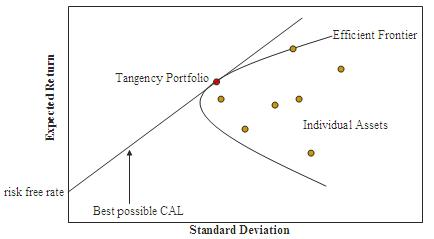

Sources:
* *Markowitz’s Portfolio Selection Model and Related Problems*, Abhijit Ravipati
* *Portfolio Selection*, Harry Markowitz
* https://sites.math.washington.edu/~burke/crs/408/fin-proj/mark1.pdf

Simulating portfolios...
Finished simulating portfolios! This took 0.5500659942626953 seconds.
Calculating empircal solution (Note: This is only for positive portfolios)...
Finding portfolio with maximum Sharpe ratio...
Portfolio found! This took 0.009985923767089844 seconds.
Finding portfolio with minimum volatility...
Portfolio found! This took 0.004994869232177734 seconds.
Finding efficient frontier...
Efficient frontier found! This took 0.5460507869720459 seconds.
Finished calculating empirical solution! This took 0.5664567947387695 
Calculating analytic solution...
Calculating Analytic Solution...
Analytic solution computed! This took 0.0017402172088623047 seconds.
Finished calculating analytic solution! This took 0.007067203521728516 
Displaying results




--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.8925
Annualised Volatility: 0.1248
Sharpe Ratio: 6.8186


               0    1  

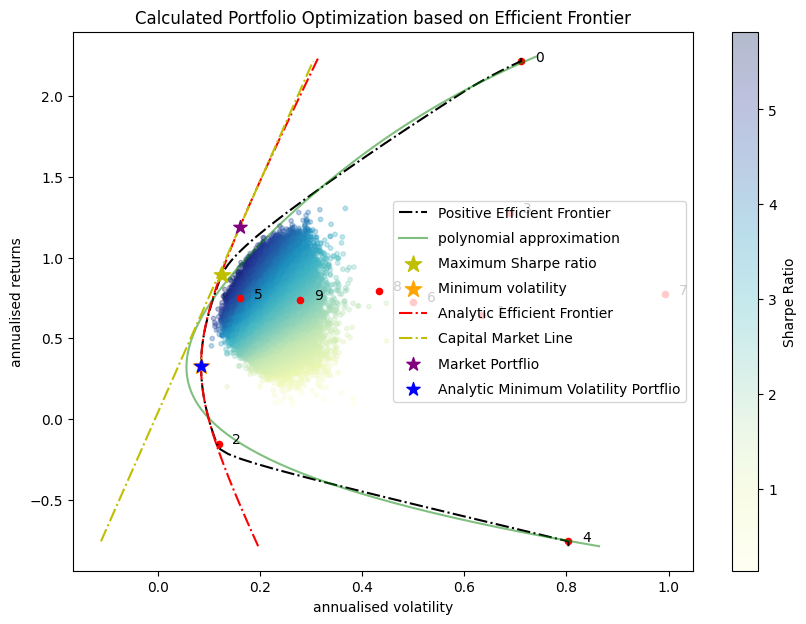

In [22]:
num_portfolios = 100000
num_decimal_points = 4
tolerance = 10**(-15)
boundary_polynomial_degree = 4
efficient_frontier_granularity = 100

plot_efficient_frontier(data, T, num_portfolios, empirical_MPT=True, analytic_MPT=True, num_decimals=num_decimal_points, 
                        tolerance=tolerance, efficient_frontier_granularity=efficient_frontier_granularity, 
                        effecient_frontier_polynomial_approximation_degree=boundary_polynomial_degree)

What you may notice is that the analytic efficient frontier is different from the observed efficient frontier. This is because the empirically calculated efficient frontier only takes into account positive portfolios. In reality, this is sometimes what we prefer since there is extra risk to shorting stocks due to the lack of a bounded downside loss. 

# The Topiary

Our Topiary algorithm relies on some Hilbert space theory. A basic overview is as follows:

Let $\Omega = \{r_1, r_2, \cdots, r_n\}$ be a set of $n$ elements which represent the rate of return of $n$ different stocks. We may define a function $K:\Omega \times \Omega \rightarrow \mathbb{R}$ by $$K(r_i, r_j) = Cov(r_i, r_j).$$
This function is in fact a positive semidefinite kernel function. Thus, we may use the canonical feature map to get an RKHS $\mathcal{H}$ with kernel $K$.

We may similarly define a feature map $\hat{\phi}:\mathcal{M}^1(\Omega) \rightarrow \mathcal{H}$ defined by $$\hat{\phi}(\mu) = \int_\Omega k_x(z) d\mu(z).$$ For each $\mu \in \mathcal{M}^1(\Omega)$ define $\hat{\mu} := \hat{\phi}(\mu)$.

Let $\psi\in\mathcal{H}$ and let $\lambda$ be some constant. Define $\eta\colon\mathcal{H}\to\mathbb{R}$ by
$$ \eta(f) = \left\langle \lambda\psi - \frac{1}{2}f, f \right\rangle.$$
The directional derivative of $\eta(f)$ in the direction of $g$ (i.e. in the direction $g-f$) is given by
$$ \iota_g(f) = \left\langle f - \lambda\psi, f - g \right\rangle.$$
Our goal is to find a local maximum for $\eta$ over probability measures. The Aesthetic Margin Update theorem states that given a function $f$ (where $f^*$ is a probability measure), either $\eta$ is locally maximized at $f$, or there exists $z\in\Omega$ such that the directional derivative of $\eta$ in the direction of $\hat{\delta_z}$ is positive. Further, the maximizing element in that direction is given by $(1-t)f + t\hat{\delta_z}$, where
$$ t = \frac{\iota_{\hat{\delta_z}}(f)}{|| \hat{\delta_z} - f||^2}$$

Behold the algorithm:

1. Let $\mu_0$ be a measure that allocates all of all of it's weight into a single stock $z_0$.
2. Iteratively define $$\mu_n = \mu_{n-1} + \frac{\iota_{\hat{\delta_{z_n}}}(\hat{\mu_{n-1}})}{|| \hat{\delta_{z_n}} - \hat{\mu_{n-1}}||^2} \left( \delta_{z_n} - \mu_{n-1}\right)$$ where $z_n$ is the point such that $\iota_{\hat{\delta_z}}(\hat{\mu_0})$ is maximized (and positive).
3. If $\eta(\hat{\mu_n}) - \eta(\hat{\mu_{n-1}}) < tolerance$, then quit and return $\mu_n$.

Simulating portfolios...
Finished simulating portfolios! This took 0.5389339923858643 seconds.
Running Pascoe's topiary algorithm...
Algorithm done! This took 0.01844000816345215 seconds.
Calculating empircal solution (Note: This is only for positive portfolios)...
Finding portfolio with maximum Sharpe ratio...
Portfolio found! This took 0.008739709854125977 seconds.
Finding portfolio with minimum volatility...
Portfolio found! This took 0.00480198860168457 seconds.
Finding efficient frontier...
Efficient frontier found! This took 0.5418741703033447 seconds.
Finished calculating empirical solution! This took 0.5605380535125732 
Calculating analytic solution...
Calculating Analytic Solution...
Analytic solution computed! This took 0.0013430118560791016 seconds.
Finished calculating analytic solution! This took 0.006293058395385742 
Displaying results




--------------------------------------------------------------------------------
Topiaric Portfolio Allocation

Annualised Return: 1.2

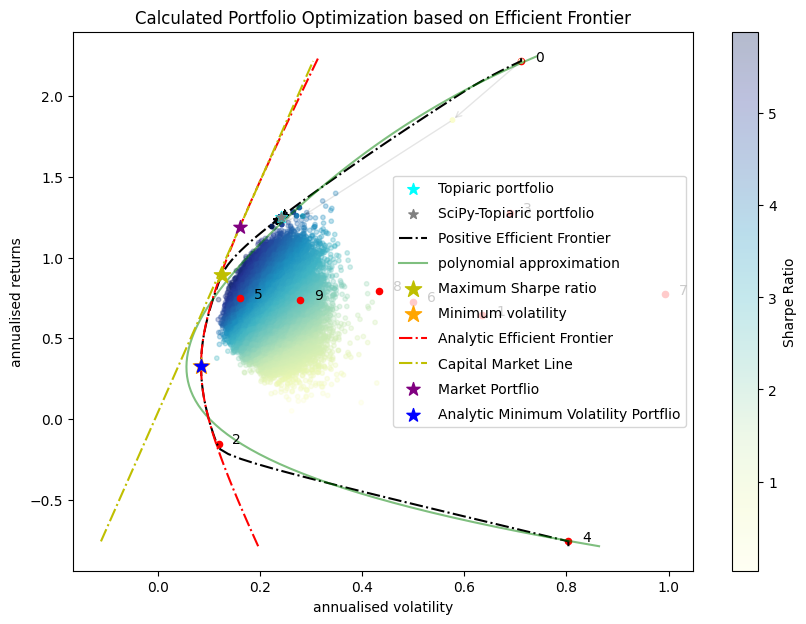

In [23]:
num_portfolios = 100000
num_decimal_points = 4
tolerance = 10**(-15)
boundary_polynomial_degree = 4
efficient_frontier_granularity = 100
const_lambda = .1


plot_efficient_frontier(data, T, num_portfolios, empirical_MPT=True, analytic_MPT=True, num_decimals=num_decimal_points,
                            tolerance=tolerance, efficient_frontier_granularity=efficient_frontier_granularity, const_for_topiary=const_lambda,
                            positive_weights_only_for_topiary=True, too_high_rate=None,
                            starting_weight_for_topiary=None,
                            effecient_frontier_polynomial_approximation_degree=boundary_polynomial_degree)